In [11]:
import matplotlib.pyplot as plt 
import glob 

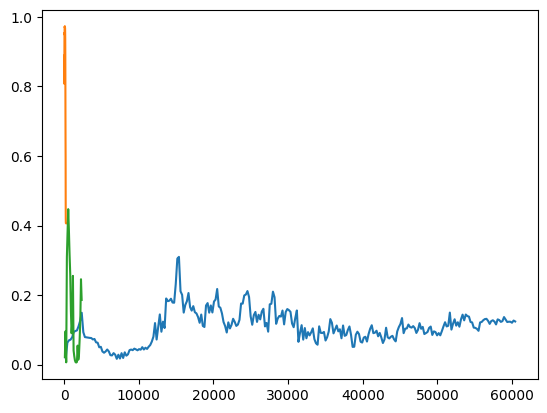

In [12]:
for ds in ['lanl14argus', 'unsw', 'optc']: 
    fn = f'../pretrained/rw_sampling/{ds}/rw_bert_{ds}_eval_tiny.csv'
    with open(fn, 'r') as f: 
        lines = f.read() 
    
    lines = lines.split('\n')[1:]

    tokens,ap = [],[]
    for l in lines:
        if not l: 
            continue 
        if ds == 'lanl14argus': 
            t,_,_,a,_ = l.split(',', maxsplit=4)
        else: 
            t,_,a,_ = l.split(',', maxsplit=3)
        
        tokens.append(float(t))
        ap.append(float(a))

    plt.plot(tokens, ap)